# Filtraggio Data Healthcare - Solo Postcode di Glasgow

Questo notebook analizza il dataset FINAL_DATA.csv e filtra per mantenere SOLO le righe il cui postcode appartiene a Glasgow.
I postcode di Glasgow tipicamente iniziano con 'G'.

In [5]:
# Import delle librerie necessarie
import pandas as pd
import numpy as np
import os

# Configurazione per visualizzare tutte le colonne
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Librerie importate con successo!")

Librerie importate con successo!


## 1. Loading del Dataset

Carichiamo il file FINAL_DATA.csv e esaminiamo la struttura of the data.

In [6]:
# Loading del dataset
file_path = r'c:\Users\glauc\Desktop\PHS\Operational_A-E\data\FINAL_DATA.csv'

# Verifica che il file esista
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully!")
    print(f"Dimensioni del dataset: {df.shape}")
    print(f"Numero di righe: {df.shape[0]:,}")
    print(f"Numero di colonne: {df.shape[1]}")
else:
    print(f"Errore: Il file {file_path} non è stato trovato.")

Dataset loaded successfully!
Dimensioni del dataset: (67716, 24)
Numero di righe: 67,716
Numero di colonne: 24


## 2. Exploration della Struttura dei Data

Esaminiamo le colonne, i tipi di dati e le prime righe del dataset, con focus particolare sulla colonna Postcode.

In [7]:
# Informazioni generali sul dataset
print("=== INFORMAZIONI GENERALI ===")
print(f"Colonne del dataset:")
print(df.columns.tolist())
print(f"\nTipi di dati:")
print(df.dtypes)

print("\n=== PRIME 5 RIGHE ===")
print(df.head())

print("\n=== INFORMAZIONI SULLA COLONNA POSTCODE ===")
print(f"Numero di postcode unici: {df['Postcode'].nunique()}")
print(f"Valori mancanti nella colonna Postcode: {df['Postcode'].isnull().sum()}")
print(f"\nPrimi 10 postcode unici:")
print(df['Postcode'].unique()[:10])

=== INFORMAZIONI GENERALI ===
Colonne del dataset:
['Unnamed: 0', 'Month', 'Country', 'HBT', 'TreatmentLocation', 'DepartmentType', 'NumberOfAttendancesAll', 'NumberWithin4HoursAll', 'NumberOver4HoursAll', 'NumberOfAttendancesEpisode', 'NumberWithin4HoursEpisode', 'NumberOver4HoursEpisode', 'NumberOver8HoursEpisode', 'NumberOver12HoursEpisode', 'HospitalName', 'Postcode', 'HealthBoard', 'HSCP', 'CouncilArea', 'IntermediateZone', 'DataZone', 'AllAges', 'Age', 'Population']

Tipi di dati:
Unnamed: 0                      int64
Month                           int64
Country                        object
HBT                            object
TreatmentLocation              object
DepartmentType                 object
NumberOfAttendancesAll          int64
NumberWithin4HoursAll           int64
NumberOver4HoursAll             int64
NumberOfAttendancesEpisode    float64
NumberWithin4HoursEpisode     float64
NumberOver4HoursEpisode       float64
NumberOver8HoursEpisode       float64
NumberOver12Ho

## 3. Identificazione dei Postcode di Glasgow

Analizziamo la colonna Postcode per identificare i postcode di Glasgow (che iniziano con 'G') e vediamo quali sono presenti nel dataset.

In [9]:
# Identificazione dei postcode di Glasgow (iniziano con 'G')
glasgow_postcodes = df[df['Postcode'].str.startswith('G', na=False)]['Postcode'].unique()
non_glasgow_postcodes = df[~df['Postcode'].str.startswith('G', na=False)]['Postcode'].unique()

print("=== POSTCODE DI GLASGOW (iniziano con 'G') ===")
print(f"Numero di postcode unici di Glasgow: {len(glasgow_postcodes)}")
print("Postcode di Glasgow trovati:")
for postcode in sorted(glasgow_postcodes)[:20]:  # Mostra i primi 20
    print(f"  {postcode}")
if len(glasgow_postcodes) > 20:
    print(f"  ... e altri {len(glasgow_postcodes) - 20} postcode")

print(f"\n=== POSTCODE NON-GLASGOW ===")
print(f"Numero di postcode unici non-Glasgow: {len(non_glasgow_postcodes)}")
print("Primi 10 postcode non-Glasgow:")
# Filtra i valori NaN prima di ordinare
valid_non_glasgow = [pc for pc in non_glasgow_postcodes if pd.notna(pc)]
for postcode in sorted(valid_non_glasgow)[:10]:
    print(f"  {postcode}")

# Contiamo le righe
glasgow_rows = df[df['Postcode'].str.startswith('G', na=False)].shape[0]
non_glasgow_rows = df[~df['Postcode'].str.startswith('G', na=False)].shape[0]

print(f"\n=== STATISTICHE RIGHE ===")
print(f"Righe con postcode di Glasgow: {glasgow_rows:,}")
print(f"Righe con postcode non-Glasgow: {non_glasgow_rows:,}")
print(f"Totale righe: {glasgow_rows + non_glasgow_rows:,}")
print(f"Percentuale Glasgow: {(glasgow_rows / df.shape[0]) * 100:.2f}%")
print(f"Percentuale non-Glasgow: {(non_glasgow_rows / df.shape[0]) * 100:.2f}%")

=== POSTCODE DI GLASGOW (iniziano con 'G') ===
Numero di postcode unici di Glasgow: 6
Postcode di Glasgow trovati:
  G21 3UW
  G4  0SF
  G42 9LF
  G51 4TF
  G75 8RG
  G83 0UA

=== POSTCODE NON-GLASGOW ===
Numero di postcode unici non-Glasgow: 56
Primi 10 postcode non-Glasgow:
  AB252ZG
  AB252ZN
  AB422XB
  AB439NF
  AB451JA
  AB534DQ
  AB548EX
  DD1 9SY
  DD112AT
  DD8 3DY

=== STATISTICHE RIGHE ===
Righe con postcode di Glasgow: 7,644
Righe con postcode non-Glasgow: 60,072
Totale righe: 67,716
Percentuale Glasgow: 11.29%
Percentuale non-Glasgow: 88.71%


## 4. Filtraggio dei Data - Solo Postcode di Glasgow

Creiamo un dataframe filtrato che mantiene SOLO le righe con postcode di Glasgow (che iniziano con 'G').

In [13]:
# Filtraggio: mantenere SOLO le righe con postcode che iniziano con 'G' (Glasgow)
df_filtered = df[df['Postcode'].str.startswith('G', na=False)].copy()

print("=== RISULTATI DEL FILTRAGGIO ===")
print(f"Dataset originale: {df.shape[0]:,} righe")
print(f"Dataset filtrato (solo Glasgow): {df_filtered.shape[0]:,} righe")
print(f"Righe rimosse (non-Glasgow): {df.shape[0] - df_filtered.shape[0]:,}")
print(f"Percentuale di dati mantenuti: {(df_filtered.shape[0] / df.shape[0]) * 100:.2f}%")

print(f"\n=== VERIFICA DEL FILTRAGGIO ===")
# Verifica che ci siano solo postcode che iniziano con 'G'
non_glasgow_check = df_filtered[~df_filtered['Postcode'].str.startswith('G', na=False)]
print(f"Postcode non-Glasgow rimasti nel dataset filtrato: {non_glasgow_check.shape[0]}")

if non_glasgow_check.shape[0] == 0:
    print("✅ SUCCESSO: Solo postcode di Glasgow sono presenti!")
else:
    print("❌ ERRORE: Alcuni postcode non-Glasgow sono ancora presenti!")

print(f"\n=== PRIME 5 RIGHE DEL DATASET FILTRATO (SOLO GLASGOW) ===")
print(df_filtered.head())

=== RISULTATI DEL FILTRAGGIO ===
Dataset originale: 67,716 righe
Dataset filtrato (solo Glasgow): 7,644 righe
Righe rimosse (non-Glasgow): 60,072
Percentuale di dati mantenuti: 11.29%

=== VERIFICA DEL FILTRAGGIO ===
Postcode non-Glasgow rimasti nel dataset filtrato: 0
✅ SUCCESSO: Solo postcode di Glasgow sono presenti!

=== PRIME 5 RIGHE DEL DATASET FILTRATO (SOLO GLASGOW) ===
      Unnamed: 0   Month    Country        HBT TreatmentLocation  \
2002     1443890  202406  S92000003  S08000031             C206H   
2003     1443891  202406  S92000003  S08000031             C206H   
2004     1443892  202406  S92000003  S08000031             C206H   
2005     1443893  202406  S92000003  S08000031             C206H   
2006     1443894  202406  S92000003  S08000031             C206H   

     DepartmentType  NumberOfAttendancesAll  NumberWithin4HoursAll  \
2002         Type 3                    1762                   1610   
2003         Type 3                    1762                   1610   


## 5. Validazione dei Risultati Filtrati - Solo Glasgow

Verifichiamo che il filtraggio sia stato eseguito correttamente e analizziamo i postcode di Glasgow rimanenti.

In [14]:
# Analysis dettagliata dei postcode di Glasgow
glasgow_postcodes_filtered = df_filtered['Postcode'].unique()

print("=== ANALISI POSTCODE DI GLASGOW ===")
print(f"Numero di postcode unici di Glasgow: {len(glasgow_postcodes_filtered)}")

print(f"\n=== TUTTI I POSTCODE DI GLASGOW ===")
for postcode in sorted(glasgow_postcodes_filtered):
    print(f"  {postcode}")

# Statistiche per hospital/location di Glasgow
print(f"\n=== STATISTICHE PER OSPEDALE DI GLASGOW ===")
hospital_stats = df_filtered.groupby('HospitalName').agg({
    'Postcode': 'nunique',
    'NumberOfAttendancesAll': 'sum'
}).round(2)
hospital_stats.columns = ['Postcode_Unici', 'Totale_Accessi']
hospital_stats = hospital_stats.sort_values('Totale_Accessi', ascending=False)
print("Ospedali di Glasgow per numero di accessi:")
print(hospital_stats)

# Analysis per Health Board e Council Area
print(f"\n=== HEALTH BOARD E COUNCIL AREA ===")
print("Health Board:")
print(df_filtered['HealthBoard'].value_counts())
print("\nCouncil Area:")
print(df_filtered['CouncilArea'].value_counts())

# Tipi di dipartimento
print(f"\n=== TIPI DI DIPARTIMENTO ===")
print(df_filtered['DepartmentType'].value_counts())

=== ANALISI POSTCODE DI GLASGOW ===
Numero di postcode unici di Glasgow: 6

=== TUTTI I POSTCODE DI GLASGOW ===
  G21 3UW
  G4  0SF
  G42 9LF
  G51 4TF
  G75 8RG
  G83 0UA

=== STATISTICHE PER OSPEDALE DI GLASGOW ===
Ospedali di Glasgow per numero di accessi:
                                     Postcode_Unici  Totale_Accessi
HospitalName                                                       
Queen Elizabeth University Hospital               1         9208199
Glasgow Royal Infirmary                           1         7687953
Royal Hospital for Children                       1         6795607
University Hospital Hairmyres                     1         5774405
New Victoria Hospital                             1         2635633
Stobhill Hospital                                 1         1952587
Vale of Leven General Hospital                    1         1780506

=== HEALTH BOARD E COUNCIL AREA ===
Health Board:
HealthBoard
S08000031    6552
S08000032    1092
Name: count, dtype: int64

Co

## 6. Salvataggio del Dataset di Glasgow

Esportiamo il dataset filtrato con SOLO i dati di Glasgow in un nuovo file CSV.

In [15]:
# Salvataggio del dataset filtrato (solo Glasgow)
output_path = r'c:\Users\glauc\Desktop\PHS\Operational_A-E\data\FINAL_DATA_GLASGOW_ONLY.csv'

try:
    df_filtered.to_csv(output_path, index=False)
    print("=== SALVATAGGIO COMPLETATO ===")
    print(f"✅ Dataset di Glasgow salvato in: {output_path}")
    print(f"📊 Righe salvate: {df_filtered.shape[0]:,}")
    print(f"📊 Colonne salvate: {df_filtered.shape[1]}")
    
    # Verifica che il file sia stato creato
    if os.path.exists(output_path):
        file_size = os.path.getsize(output_path) / (1024 * 1024)  # MB
        print(f"📁 Dimensione file: {file_size:.2f} MB")
        print(f"✅ Verifica: Il file è stato creato correttamente")
    else:
        print(f"❌ Errore: Il file non è stato creato")
        
except Exception as e:
    print(f"❌ Errore durante il salvataggio: {e}")

print(f"\n=== RIEPILOGO FINALE ===")
print(f"Dataset originale: {df.shape[0]:,} righe")
print(f"Dataset filtrato (solo Glasgow): {df_filtered.shape[0]:,} righe")
print(f"Righe rimosse (non-Glasgow): {df.shape[0] - df_filtered.shape[0]:,}")
print(f"Percentuale di dati di Glasgow: {(df_filtered.shape[0] / df.shape[0]) * 100:.2f}%")
print(f"File salvato: FINAL_DATA_GLASGOW_ONLY.csv")

=== SALVATAGGIO COMPLETATO ===
✅ Dataset di Glasgow salvato in: c:\Users\glauc\Desktop\PHS\Operational_A-E\data\FINAL_DATA_GLASGOW_ONLY.csv
📊 Righe salvate: 7,644
📊 Colonne salvate: 24
📁 Dimensione file: 1.40 MB
✅ Verifica: Il file è stato creato correttamente

=== RIEPILOGO FINALE ===
Dataset originale: 67,716 righe
Dataset filtrato (solo Glasgow): 7,644 righe
Righe rimosse (non-Glasgow): 60,072
Percentuale di dati di Glasgow: 11.29%
File salvato: FINAL_DATA_GLASGOW_ONLY.csv


## 7. Visualization degli Ospedali di Glasgow

Create visualizations per analizzare meglio la distribuzione e le performance degli ospedali di Glasgow.

In [16]:
# Import librerie per visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configurazione stile charts
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerie di visualizzazione caricate!")
print(f"Dataset di Glasgow disponibile con {df_filtered.shape[0]:,} righe")

Librerie di visualizzazione caricate!
Dataset di Glasgow disponibile con 7,644 righe


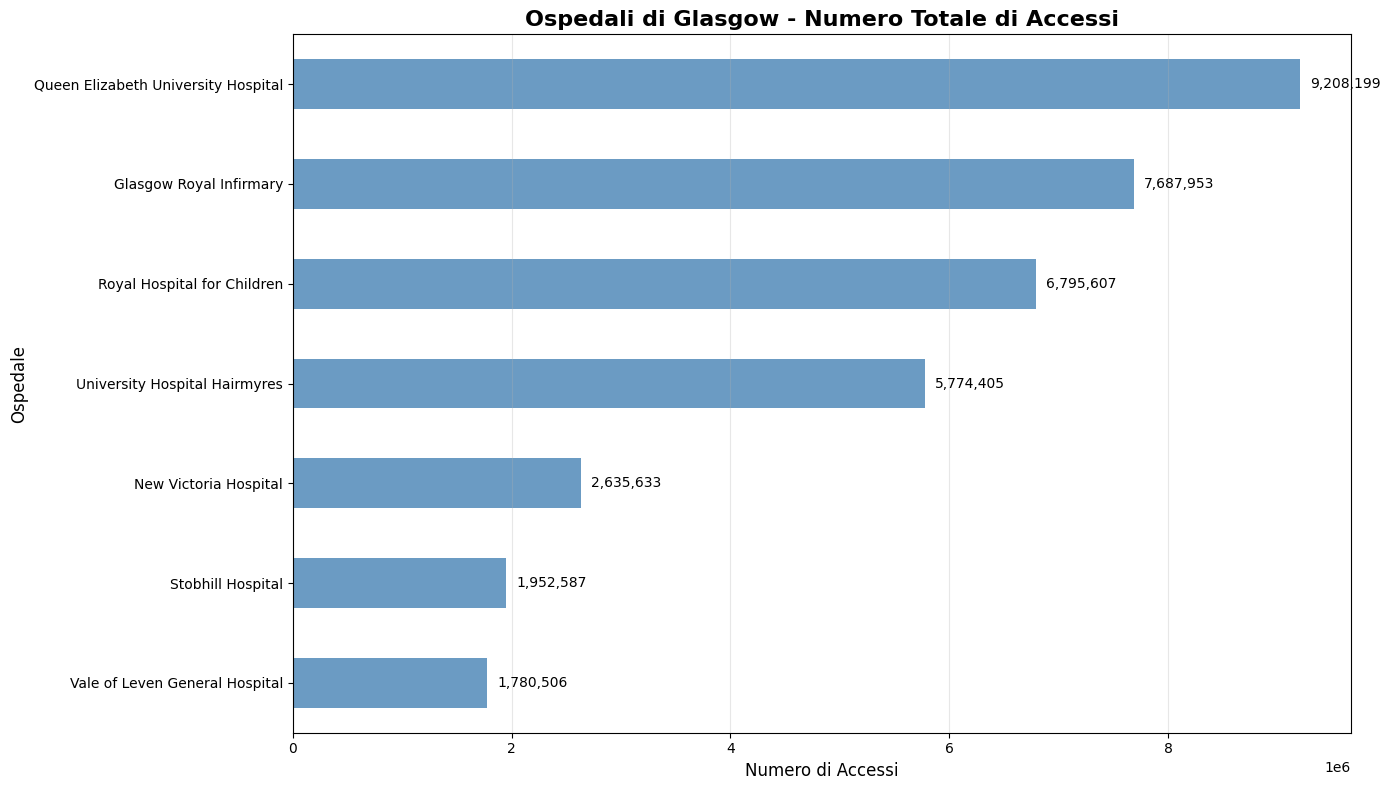


=== RIEPILOGO OSPEDALI DI GLASGOW ===
Numero totale di ospedali: 7
Totale accessi negli ospedali di Glasgow: 35,834,890
Media accessi per hospital: 5,119,270
Ospedale con più accessi: Queen Elizabeth University Hospital (9,208,199 accessi)
Ospedale con meno accessi: Vale of Leven General Hospital (1,780,506 accessi)


In [17]:
# 1. Grafico a barre degli ospedali di Glasgow per numero di accessi
plt.figure(figsize=(14, 8))

# Aggregazione dati per hospital
hospital_data = df_filtered.groupby('HospitalName')['NumberOfAttendancesAll'].sum().sort_values(ascending=True)

# Grafico a barre orizzontale
ax = hospital_data.plot(kind='barh', color='steelblue', alpha=0.8)
plt.title('Ospedali di Glasgow - Numero Totale di Accessi', fontsize=16, fontweight='bold')
plt.xlabel('Numero di Accessi', fontsize=12)
plt.ylabel('Ospedale', fontsize=12)

# Aggiungi valori sulle barre
for i, v in enumerate(hospital_data.values):
    ax.text(v + max(hospital_data.values) * 0.01, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

print(f"\n=== RIEPILOGO OSPEDALI DI GLASGOW ===")
print(f"Numero totale di ospedali: {len(hospital_data)}")
print(f"Totale accessi negli ospedali di Glasgow: {hospital_data.sum():,}")
print(f"Media accessi per hospital: {hospital_data.mean():,.0f}")
print(f"Ospedale con più accessi: {hospital_data.index[-1]} ({hospital_data.iloc[-1]:,} accessi)")
print(f"Ospedale con meno accessi: {hospital_data.index[0]} ({hospital_data.iloc[0]:,} accessi)")

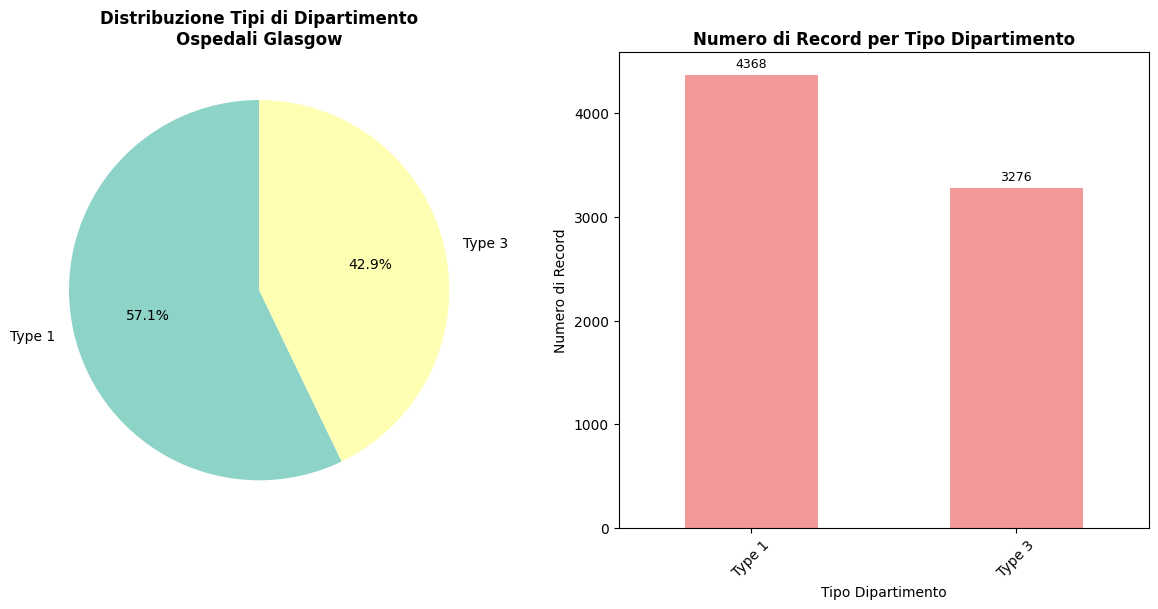


=== DISTRIBUZIONE TIPI DI DIPARTIMENTO ===
Type 1: 4,368 record (57.1%)
Type 3: 3,276 record (42.9%)


In [18]:
# 2. Distribuzione per tipo di dipartimento negli ospedali di Glasgow
plt.figure(figsize=(12, 6))

dept_data = df_filtered['DepartmentType'].value_counts()

# Grafico a torta
plt.subplot(1, 2, 1)
colors = plt.cm.Set3(range(len(dept_data)))
plt.pie(dept_data.values, labels=dept_data.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('Distribuzione Tipi di Dipartimento\nOspedali Glasgow', fontsize=12, fontweight='bold')

# Grafico a barre
plt.subplot(1, 2, 2)
dept_data.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Numero di Record per Tipo Dipartimento', fontsize=12, fontweight='bold')
plt.xlabel('Tipo Dipartimento', fontsize=10)
plt.ylabel('Numero di Record', fontsize=10)
plt.xticks(rotation=45)

# Aggiungi valori sulle barre
ax = plt.gca()
for i, v in enumerate(dept_data.values):
    ax.text(i, v + max(dept_data.values) * 0.01, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n=== DISTRIBUZIONE TIPI DI DIPARTIMENTO ===")
for dept, count in dept_data.items():
    percentage = (count / dept_data.sum()) * 100
    print(f"{dept}: {count:,} record ({percentage:.1f}%)")

In [ ]:
# 3. Analysis delle performance temporali (tempi di attesa)
plt.figure(figsize=(15, 10))

# Calcola le percentuali di patients entro 4 ore per hospital
performance_data = df_filtered.groupby('HospitalName').agg({
    'NumberOfAttendancesAll': 'sum',
    'NumberWithin4HoursAll': 'sum',
    'NumberOver4HoursAll': 'sum'
}).reset_index()

performance_data['Percentuale_Entro_4h'] = (performance_data['NumberWithin4HoursAll'] / 
                                           performance_data['NumberOfAttendancesAll'] * 100)

# Ordina per percentuale
performance_data = performance_data.sort_values('Percentuale_Entro_4h', ascending=True)

# Subplot 1: Percentuale patients entro 4 ore
plt.subplot(2, 2, 1)
bars = plt.barh(performance_data['HospitalName'], performance_data['Percentuale_Entro_4h'], 
                color='green', alpha=0.7)
plt.title('% Pazienti Trattati Entro 4 Ore\nOspedali Glasgow', fontsize=12, fontweight='bold')
plt.xlabel('Percentuale (%)', fontsize=10)
plt.xlim(0, 100)

# Aggiungi linea di riferimento al 95% (target NHS)
plt.axvline(x=95, color='red', linestyle='--', alpha=0.7, label='Target 95%')
plt.legend()

# Aggiungi valori
for i, v in enumerate(performance_data['Percentuale_Entro_4h']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=8)

# Subplot 2: Numero totale accessi per hospital
plt.subplot(2, 2, 2)
plt.barh(performance_data['HospitalName'], performance_data['NumberOfAttendancesAll'], 
         color='steelblue', alpha=0.7)
plt.title('Numero Totale Accessi\nOspedali Glasgow', fontsize=12, fontweight='bold')
plt.xlabel('Numero Accessi', fontsize=10)

# Subplot 3: Confronto accessi entro/oltre 4 ore
plt.subplot(2, 2, 3)
width = 0.35
x = range(len(performance_data))
plt.bar([i - width/2 for i in x], performance_data['NumberWithin4HoursAll'], 
        width, label='Entro 4h', color='green', alpha=0.7)
plt.bar([i + width/2 for i in x], performance_data['NumberOver4HoursAll'], 
        width, label='Oltre 4h', color='red', alpha=0.7)
plt.title('Accessi: Entro vs Oltre 4 Ore', fontsize=12, fontweight='bold')
plt.xlabel('Ospedali', fontsize=10)
plt.ylabel('Numero Accessi', fontsize=10)
plt.xticks(x, [name[:15] + '...' if len(name) > 15 else name for name in performance_data['HospitalName']], 
           rotation=45, ha='right')
plt.legend()

# Subplot 4: Distribuzione postcode per hospital
plt.subplot(2, 2, 4)
postcode_per_hospital = df_filtered.groupby('HospitalName')['Postcode'].nunique().sort_values(ascending=False)
plt.bar(range(len(postcode_per_hospital)), postcode_per_hospital.values, 
        color='orange', alpha=0.7)
plt.title('Numero Postcode Unici per Ospedale', fontsize=12, fontweight='bold')
plt.xlabel('Ospedali', fontsize=10)
plt.ylabel('Numero Postcode', fontsize=10)
plt.xticks(range(len(postcode_per_hospital)), 
           [name[:10] + '...' if len(name) > 10 else name for name in postcode_per_hospital.index], 
           rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(f"\n=== PERFORMANCE OSPEDALI DI GLASGOW ===")
for _, row in performance_data.iterrows():
    print(f"{row['HospitalName']}:")
    print(f"  - Accessi totali: {row['NumberOfAttendancesAll']:,}")
    print(f"  - Entro 4h: {row['NumberWithin4HoursAll']:,} ({row['Percentuale_Entro_4h']:.1f}%)")
    print(f"  - Oltre 4h: {row['NumberOver4HoursAll']:,}")
    print()

In [19]:
# 4. Tabella riassuntiva completa degli ospedali di Glasgow
print("="*80)
print("TABELLA RIASSUNTIVA COMPLETA - OSPEDALI DI GLASGOW")
print("="*80)

# Crea una tabella completa con tutte le informazioni
summary_table = df_filtered.groupby(['HospitalName', 'Postcode']).agg({
    'NumberOfAttendancesAll': 'sum',
    'NumberWithin4HoursAll': 'sum',
    'NumberOver4HoursAll': 'sum',
    'DepartmentType': lambda x: ', '.join(x.unique()),
    'HealthBoard': 'first',
    'CouncilArea': 'first'
}).reset_index()

summary_table['Percentuale_Entro_4h'] = (summary_table['NumberWithin4HoursAll'] / 
                                         summary_table['NumberOfAttendancesAll'] * 100)

# Ordina per numero di accessi
summary_table = summary_table.sort_values('NumberOfAttendancesAll', ascending=False)

print(f"{'OSPEDALE':<35} {'POSTCODE':<10} {'ACCESSI':<10} {'ENTRO 4H':<8} {'OLTRE 4H':<10} {'% ENTRO 4H':<10}")
print("-" * 80)

for _, row in summary_table.iterrows():
    name = row['HospitalName'][:34] + '...' if len(row['HospitalName']) > 34 else row['HospitalName']
    print(f"{name:<35} {row['Postcode']:<10} {row['NumberOfAttendancesAll']:<10,} "
          f"{row['NumberWithin4HoursAll']:<8,} {row['NumberOver4HoursAll']:<10,} {row['Percentuale_Entro_4h']:<10.1f}")

print("-" * 80)
print(f"{'TOTALE':<35} {'':<10} {summary_table['NumberOfAttendancesAll'].sum():<10,} "
      f"{summary_table['NumberWithin4HoursAll'].sum():<8,} {summary_table['NumberOver4HoursAll'].sum():<10,} "
      f"{(summary_table['NumberWithin4HoursAll'].sum() / summary_table['NumberOfAttendancesAll'].sum() * 100):<10.1f}")

print(f"\n=== INFORMAZIONI AGGIUNTIVE ===")
print(f"Numero ospedali di Glasgow: {len(summary_table)}")
print(f"Postcode di Glasgow nel dataset: {', '.join(sorted(summary_table['Postcode'].unique()))}")
print(f"Health Board: {', '.join(summary_table['HealthBoard'].unique())}")
print(f"Council Area: {', '.join(summary_table['CouncilArea'].unique())}")
print(f"Tipi di dipartimento: {', '.join(summary_table['DepartmentType'].str.split(', ').explode().unique())}")

# Salva anche la tabella riassuntiva
summary_path = r'c:\Users\glauc\Desktop\PHS\Operational_A-E\data\GLASGOW_HOSPITALS_SUMMARY.csv'
summary_table.to_csv(summary_path, index=False)
print(f"\n✅ Tabella riassuntiva salvata in: {summary_path}")

TABELLA RIASSUNTIVA COMPLETA - OSPEDALI DI GLASGOW
OSPEDALE                            POSTCODE   ACCESSI    ENTRO 4H OLTRE 4H   % ENTRO 4H
--------------------------------------------------------------------------------
Queen Elizabeth University Hospita... G51 4TF    9,208,199  4,723,446 4,484,753  51.3      
Glasgow Royal Infirmary             G4  0SF    7,687,953  4,205,929 3,482,024  54.7      
Royal Hospital for Children         G51 4TF    6,795,607  6,163,612 631,995    90.7      
University Hospital Hairmyres       G75 8RG    5,774,405  3,032,484 2,741,921  52.5      
New Victoria Hospital               G42 9LF    2,635,633  2,611,063 24,570     99.1      
Stobhill Hospital                   G21 3UW    1,952,587  1,857,219 95,368     95.1      
Vale of Leven General Hospital      G83 0UA    1,780,506  1,631,357 149,149    91.6      
--------------------------------------------------------------------------------
TOTALE                                         35,834,890 24,225,1